In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('auto-mpg.csv')

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
data = data.drop('car name',axis =1)

In [7]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [8]:
data.shape

(398, 8)

In [9]:
data['origin'] = data['origin'].replace({1:'America',2:'Europe',3:'Asia'})

In [10]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America


In [11]:
data = pd.get_dummies(data,columns=['origin'])

In [12]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [13]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    object 
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_America  398 non-null    uint8  
 8   origin_Asia     398 non-null    uint8  
 9   origin_Europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


In [15]:
h = pd.DataFrame(data.horsepower.str.isdigit())

In [16]:
data[h['horsepower']== False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [17]:
data = data.replace('?',np.nan)
data[h['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [19]:
m = lambda x: x.fillna(x.median())
data = data.apply(m,axis = 0)

In [20]:
data['horsepower'] = data['horsepower'].astype('float64')

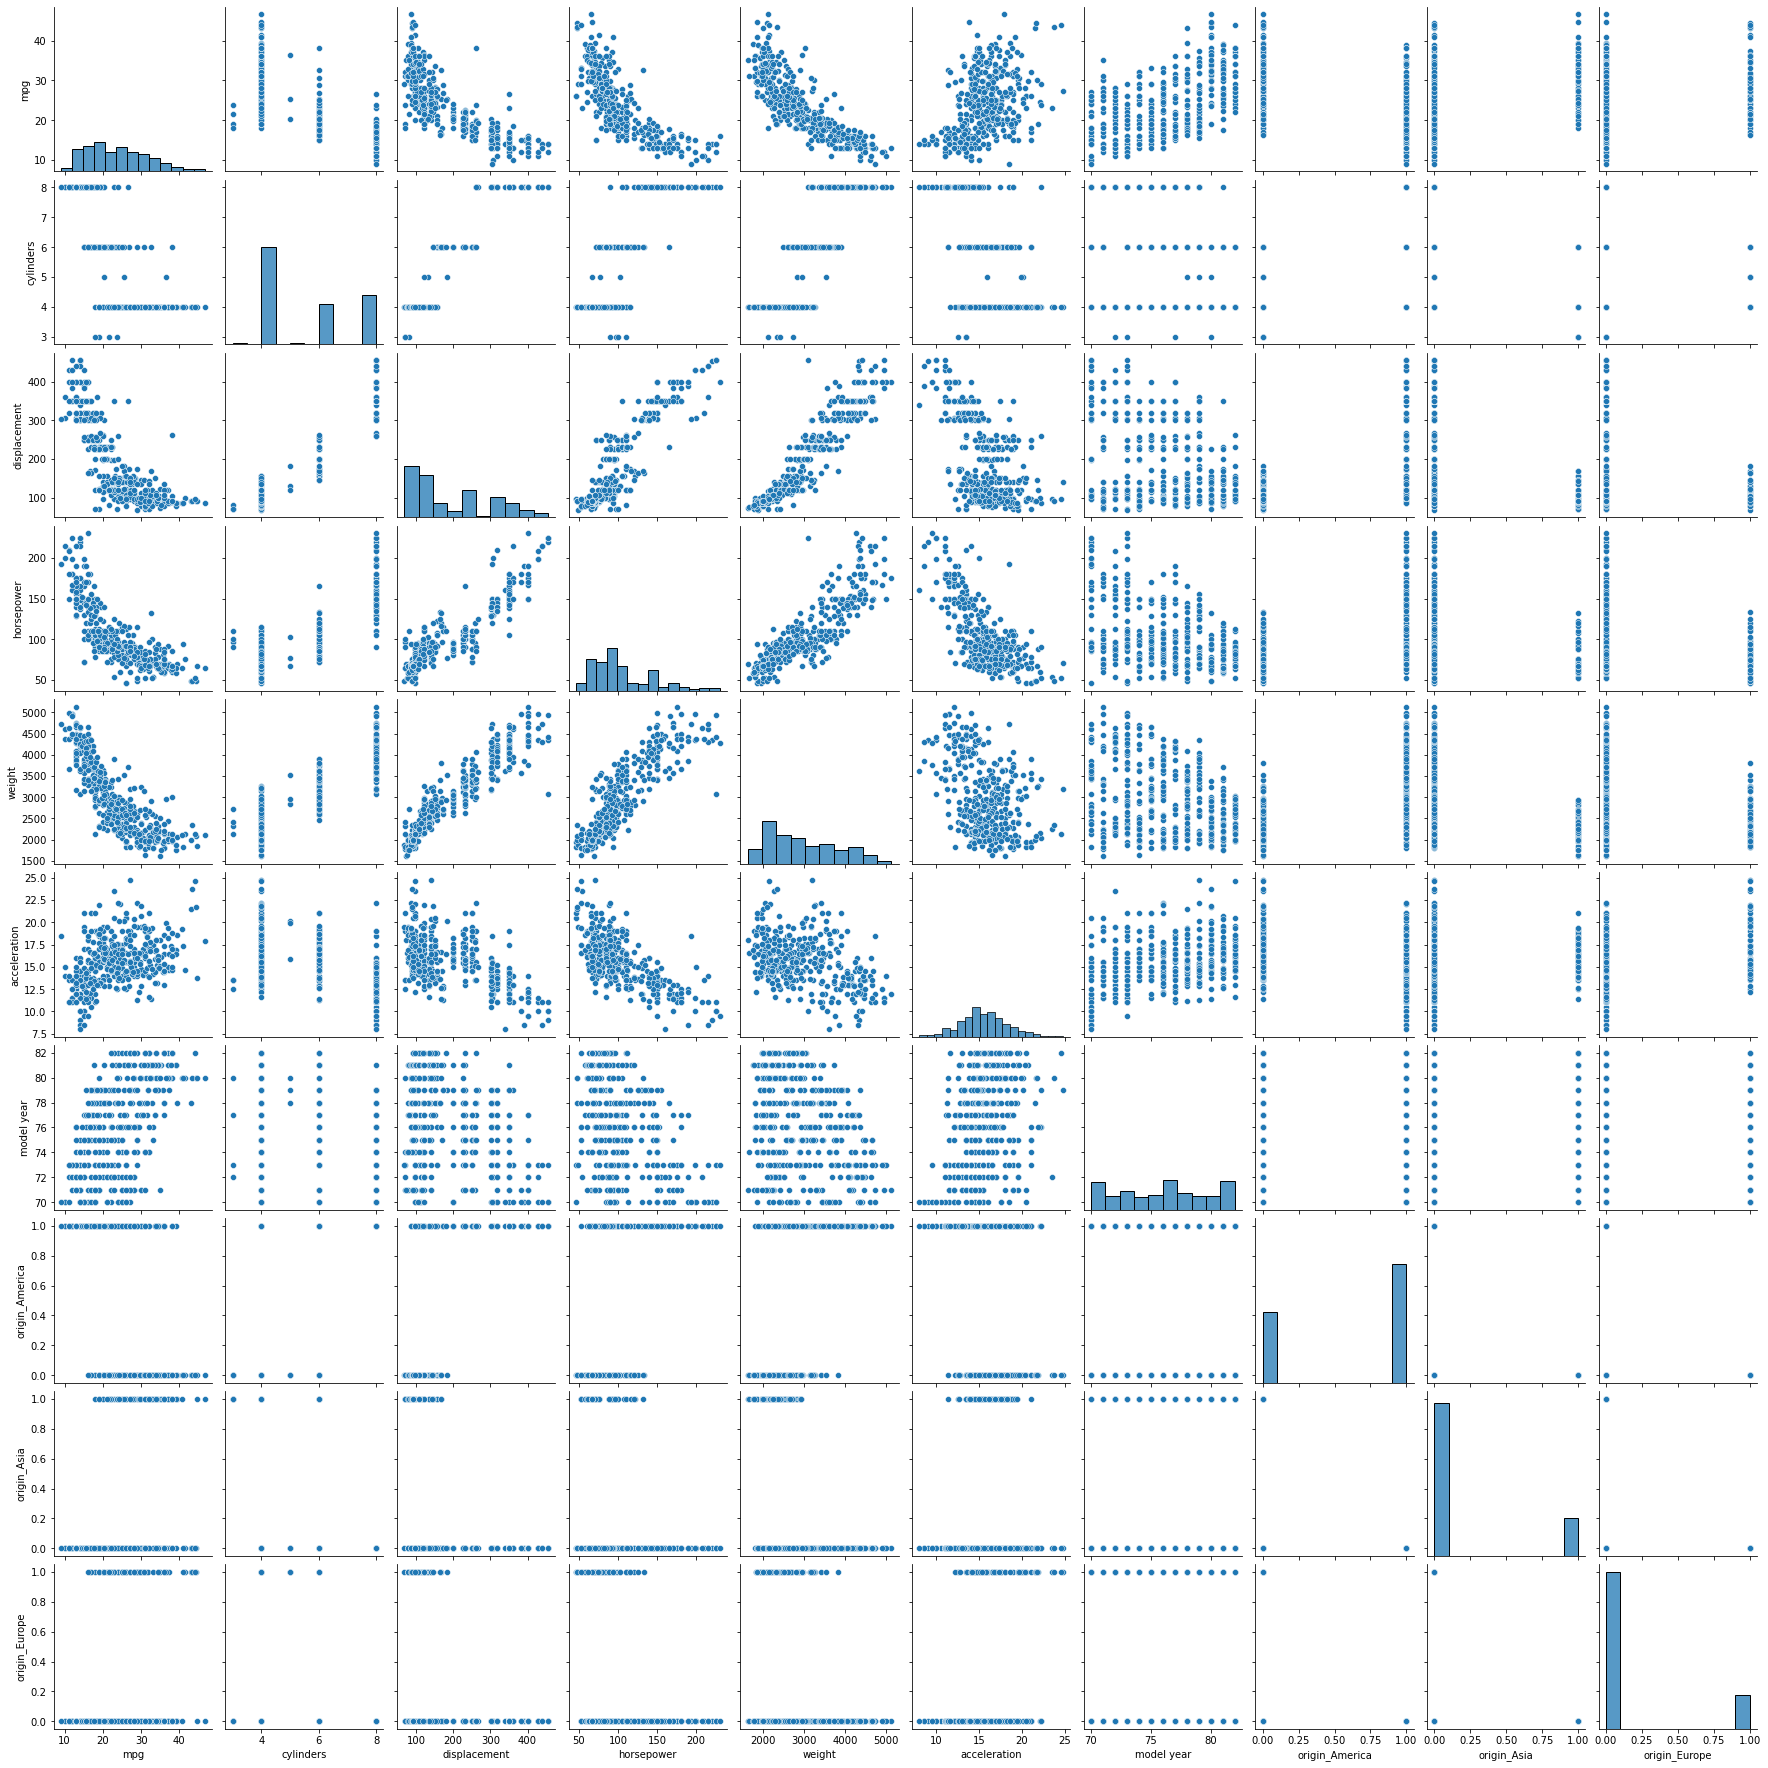

In [22]:
sns.pairplot(data)

In [24]:
x = data.drop(['mpg','origin_Europe'],axis =1)
y = data['mpg']

In [25]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia
0,8,307.0,130.0,3504,12.0,70,1,0
1,8,350.0,165.0,3693,11.5,70,1,0
2,8,318.0,150.0,3436,11.0,70,1,0
3,8,304.0,150.0,3433,12.0,70,1,0
4,8,302.0,140.0,3449,10.5,70,1,0


In [27]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state =1)

In [1]:
model = LinearRegression()
model.fit(x_train,y_train)

NameError: name 'LinearRegression' is not defined

LinearRegression()

In [31]:
for idx,col_name in enumerate(x_train.columns):
    print("The coefficient of {0} is {1}".format(col_name,model.coef_[idx]))

The coefficient of cylinders is -0.39480796616482666
The coefficient of displacement is 0.028945510765487466
The coefficient of horsepower is -0.02175220772354736
The coefficient of weight is -0.00735203206514735
The coefficient of acceleration is 0.06191936600761837
The coefficient of model year is 0.8369338917645005
The coefficient of origin_America is -3.0012830009185136
The coefficient of origin_Asia is -0.6060179643247388


In [33]:
print("The intercept for the model is :",model.intercept_)

The intercept for the model is : -18.28345111637213


In [34]:
model.score(x_train,y_train)

0.8141025501610559

In [36]:
model.score(x_test,y_test)

0.8433135132808827